In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd 
df=pd.read_csv("//content/drive/MyDrive/pima-indians-diabetes.csv")

In [4]:
df

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
my_model = DecisionTreeClassifier().fit(X_train, y_train)

In [19]:
#!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(X_test,y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0781 ± 0.0401,Glucose
0.0573 ± 0.0390,Age
0.0302 ± 0.0153,Pregnancies
0.0240 ± 0.0204,SkinThickness
0.0146 ± 0.0267,BMI
0.0031 ± 0.0234,DiabetesPedigreeFunction
-0.0021 ± 0.0169,Insulin
-0.0042 ± 0.0167,BloodPressure


In [23]:
feature_names = [i for i in df.drop('Outcome',axis=1).columns]

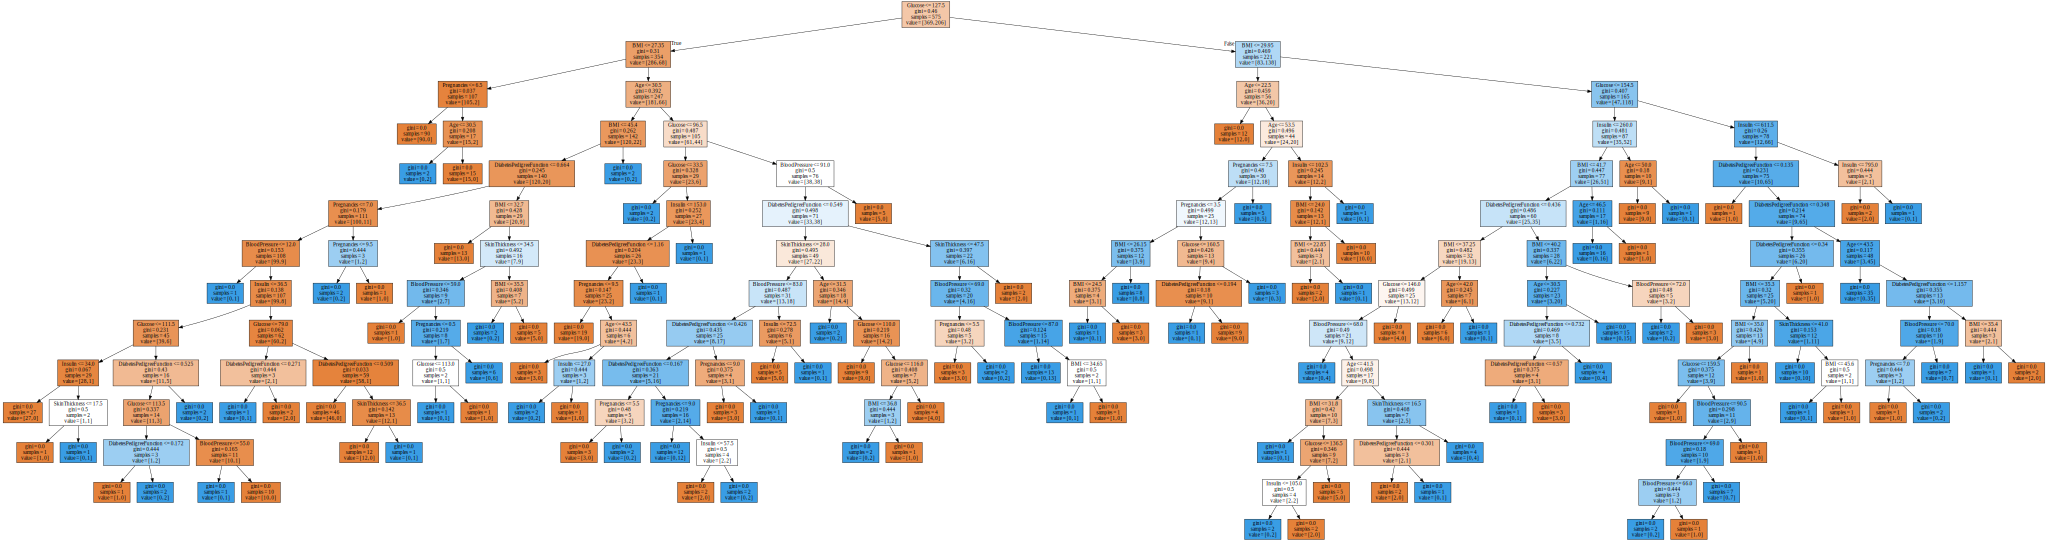

In [24]:
from sklearn import tree
import graphviz

tree_graph = tree.export_graphviz(my_model, out_file=None, feature_names=feature_names,filled = True)
graphviz.Source(tree_graph)

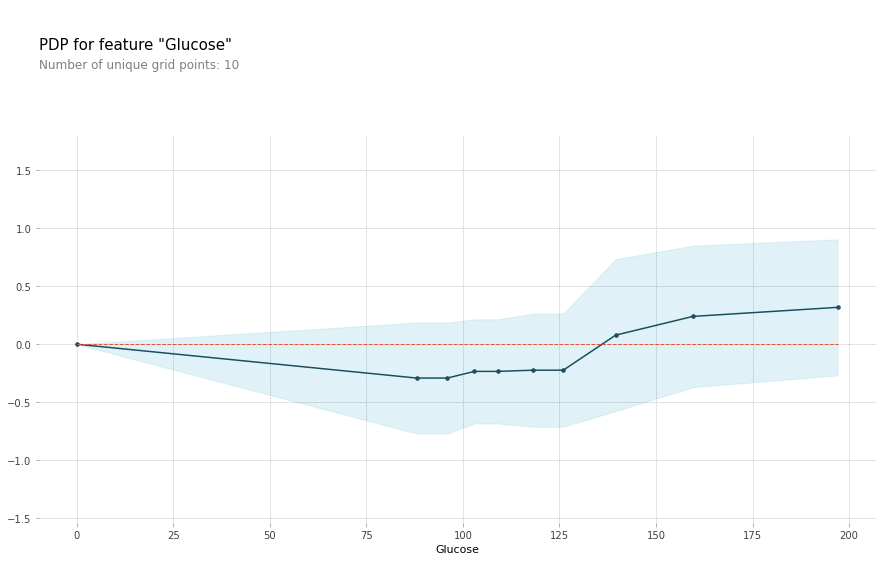

In [28]:
#!pip install PDPbox
from pdpbox import pdp, get_dataset, info_plots
import matplotlib.pyplot as plt

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=my_model, dataset=X_test, model_features=feature_names, feature='Glucose')

# plot it
pdp.pdp_plot(pdp_goals, 'Glucose')
plt.show()

#blue area:confidence interval

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


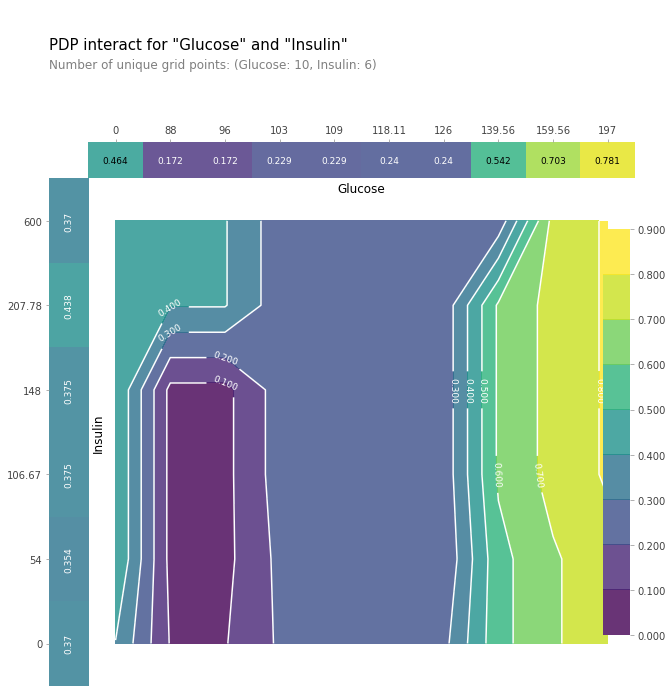

In [30]:
features_to_plot = ['Glucose','Insulin']
inter1  =  pdp.pdp_interact(model=my_model, dataset=X_test, model_features=feature_names, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour', plot_pdp=True)
plt.show()

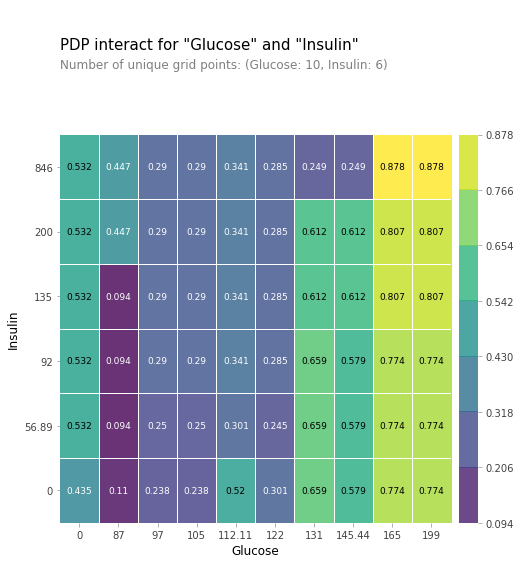

In [31]:
inter1  =  pdp.pdp_interact(model=my_model, dataset=X_train, model_features=feature_names, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='grid')

plt.show()

In [33]:
#!pip install lime
import lime
import lime.lime_tabular

     |████████████████████████████████| 276kB 6.6MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283846 sha256=fb33dbcbc0d01d803b52558694495eb984af6bac6ccf45d0f64d4cb3f1de6c2e
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [45]:
predict_fn_dt = lambda x: my_model.predict_proba(x).astype(float)
X = X_train.values
explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = X_train.columns,class_names=['Not Diabetes','Diabetes'],kernel_width=5)

In [46]:
X_test.loc[[50]]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
50,1,101,50,15,36,24.2,0.526,26


In [47]:
choosen_one = X_test.loc[[50]].values[0]

In [48]:
exp = explainer.explain_instance(choosen_one, predict_fn_dt,num_features=10)
exp.show_in_notebook(show_all=False)

In [49]:
y_test.loc[[50]]

50    0
Name: Outcome, dtype: int64

In [51]:
!pip install shap
import shap

     |████████████████████████████████| 358kB 8.3MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491636 sha256=3292e14a5071dbdb372887f00b76ce6c6ad6225749aeaddf998e22bd2f563d54
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [52]:
explainer = shap.TreeExplainer(my_model)

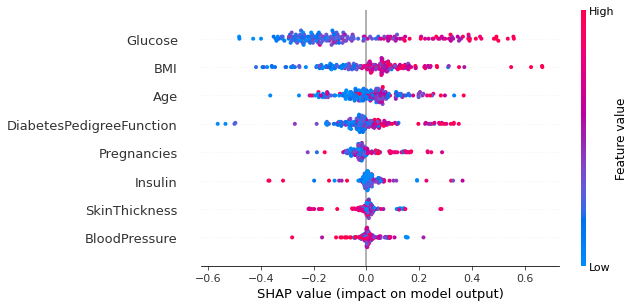

In [53]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1],X_test)

In [55]:
shap.initjs()
explainer = shap.TreeExplainer(my_model)
shap_values = explainer.shap_values(X_train)
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_train.iloc[0,:])

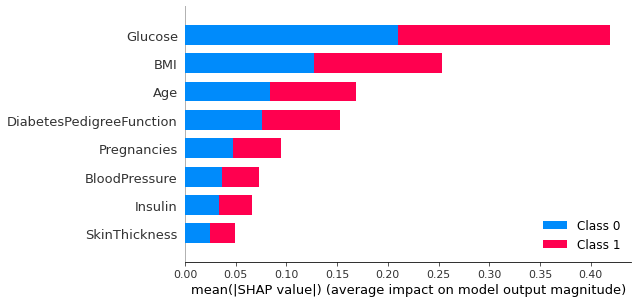

In [57]:
shap.summary_plot(shap_values, X_train)

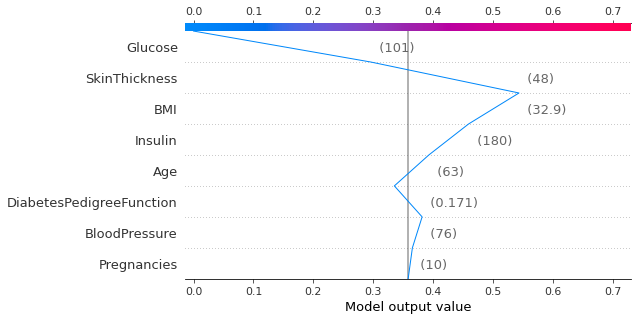

In [58]:
shap.decision_plot(explainer.expected_value[1], shap_values[1][0,:], X_train.iloc[0,:])